## Monthly Data Analysis


* Team: Dollywood
* Instructor name: Nick McCarty and Julian Ward

## Table of Contents


* [***Data Importing***](#Data-Importing)   (links to the data sources below.)
     * [Box Office Mojo](https://www.boxofficemojo.com/)
     * [IMDB](https://www.imdb.com/)
     * [Rotten Tomatoes](https://www.rottentomatoes.com/)
     * [TheMovieDB](https://www.themoviedb.org/)
     * [The Numbers](https://www.the-numbers.com/)
* [***Data Cleaning***](#Data-Cleaning) 
* [***Months With Most Movie Releases from 1915-2020***](#Months-With-Most-Movie-Releases-from-1915-2020) 
* [***Months with the Most Profit Worldwide***](#Months-with-the-Most-Profit-Worldwide) 
* [***Months with the Most Profit Domestic***](#Months-with-the-Most-Profit-Domestic)

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 

#don't show warning because I know what I am doing lol
import warnings
warnings.filterwarnings('ignore')

## Data Importing

In [2]:
# Connect to imdb database in sql
conn = sqlite3.connect('zippedData/im.db')

In [3]:
#movie basics from imdb
imdb_movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
imdb_movie_basics.head(3)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


In [4]:
#movie ratings from imdb
imdb_movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)
imdb_movie_ratings.head(3)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20


In [5]:
# movie gross data from Box Office Mojo
bom_movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
bom_movie_gross.head(3)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010


In [6]:
#movie details from TheMovieDB
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz').drop('Unnamed: 0', axis = 1)
tmdb_movies.head(3)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368


In [7]:
#movie budgets data from The Numbers
tn_movies_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
tn_movies_budgets.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"


In [8]:
#movies info from Rotten Tomatoes
rt_movies_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep = '\t')
rt_movies_info.head(3)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN


In [9]:
#movie reviews from Rotten Tomatoes
rt_movies_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep = '\t', encoding='latin')
rt_movies_reviews.head(3)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"


## Data Cleaning

In [10]:
#we are using movie budgets from TheNumbers

#convert the dollar values for the budgets into floats
tn_movies_budgets[['production_budget', 'domestic_gross', 'worldwide_gross']] = tn_movies_budgets[['production_budget', 'domestic_gross', 'worldwide_gross']].replace("[$,]", "", regex=True).astype(float)

#make release date into datetime, then create variable called release_month
tn_movies_budgets['release_date'] = pd.to_datetime(tn_movies_budgets['release_date'])
tn_movies_budgets['release_month'] = tn_movies_budgets['release_date'].dt.month
tn_movies_budgets.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,12
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,6


The movie budgets table from The Numbers source required a lot of data cleaning. The first step was to convert the dollar values in the dataframe into floats from strings. This allowed the plot to recognize them as quantitative variables. The next step was to convert release date into the desired datetime format. This allowed the code to decipher months based off the numeric in the month spot of the release date. Thus creating a new variable that would be used for monthly financial classification purposes. 

In [11]:
#create domestic and worldwide profits as the gross minus the budget
tn_movies_budgets['domestic_profit'] = tn_movies_budgets['domestic_gross'] - tn_movies_budgets['production_budget']
tn_movies_budgets['worldwide_profit'] = tn_movies_budgets['worldwide_gross'] - tn_movies_budgets['production_budget']
tn_movies_budgets.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,domestic_profit,worldwide_profit
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,12,335507625.0,2.351345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,-169536125.0,6.350639e+08
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,6,-307237650.0,-2.002376e+08


 This part of the code was done in an effort to create new return on investment variables based off existing data revenue and production costs. The production_budget column was subtracted from both domestic_gross and worldwide_gross. The new variables displayed the return on investment for each movie both domestically and worldwide.

## Months With Most Movie Releases from 1915-2020

In [12]:
#check the range of dates 
tn_movies_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross,release_month,domestic_profit,worldwide_profit
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07,7.050675,1.028557e+07,5.989970e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08,3.480147,4.992137e+07,1.460889e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,1.000000,-3.072376e+08,-2.002376e+08
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06,4.000000,-9.132757e+06,-2.189071e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07,7.000000,-3.487755e+05,8.550286e+06
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07,10.000000,1.778144e+07,6.096850e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,12.000000,6.306622e+08,2.351345e+09


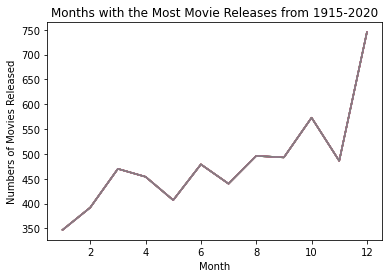

In [13]:
# months that have the most movie releases, from youtube
months = [month for month, df in tn_movies_budgets.groupby('release_month')]

plt.plot(months, tn_movies_budgets.groupby(['release_month']).count())

plt.title("Months with the Most Movie Releases from 1915-2020")
plt.ylabel("Numbers of Movies Released")
plt.xlabel('Month')

plt.show()

The plot above shows the correlation between month in a year and the number of movies released. The releases range from 350 to 750 per month from the years 1915 to 2020. The dataset is large enough to indicate industry trends as release months towards the end of the year is more favoured. This is partly due to the consideration of award (Oscars, Emmys, etc.) deadlines. The voting committes prefer to remember and favor movies closer to the deadline which conincides with when voting takes place and consequently when movies are more likely to be released.

## Months with the Most Profit Worldwide

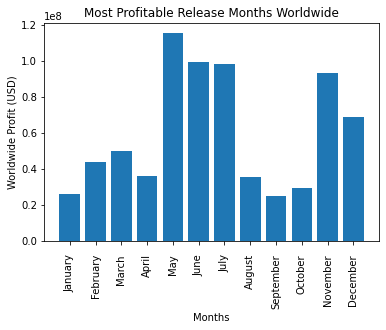

In [14]:
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

#bar plot of top movies
fig, axs = plt.subplots()

axs.bar(months,
         tn_movies_budgets.groupby(['release_month'])['worldwide_profit'].mean())
axs.set_title('Most Profitable Release Months Worldwide')
axs.set_xlabel('Months')
axs.set_ylabel('Worldwide Profit (USD)')
axs.set_xticklabels(month_names, rotation=90)
axs.set_xticks(months)
axs.tick_params(axis="x", direction="out", pad=10)

The plot above shows the distibution for worlwide profit (USD in hundreds of millions) for all of the months from 1915-2020. The x-axis represents the 12 months in a year. The y-axis represents the average profit worldwide for each month based on the films that were released in each of those correlated months. The data bar plot displays a large rise in profit during the months May-July and November-December. 

## Months with the Most Profit Domestic

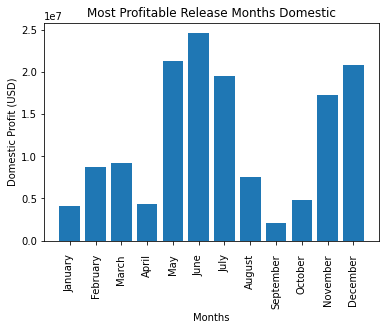

In [15]:
#some movies were not released domestically, take them out of dataset
tn_movies_budgets_domestic = tn_movies_budgets[tn_movies_budgets['domestic_gross'] != 0]

#bar plot of top months
fig, axs = plt.subplots()

axs.bar(months,
         tn_movies_budgets_domestic.groupby(['release_month'])['domestic_profit'].mean())
axs.set_title('Most Profitable Release Months Domestic')
axs.set_xlabel('Months')
axs.set_ylabel('Domestic Profit (USD)')
axs.set_xticklabels(month_names, rotation=90)
axs.set_xticks(months)
axs.tick_params(axis="x", direction="out", pad=10)

Similar to the plot above this plot also shows the distibution for domestic profit (USD in hundreds of millions) for all of the months from 1915-2020. The x-axis represents the 12 months in a year. The y-axis represents the average profit domestically for each month based on the films that were released in each of those correlated months. The data bar plot displays a similar pattern to the worldwide profit as their is a large rise in profit during the months from May-July and November-December. 

The large amounts of profits in the summer (May - July) and winter (November - December) indicates the schedules of audience free time dedicated to recreational activities such as watching a movie with family or friends. The movie studio would be wise to line up large project or blockbuster types of movies with these high activity months as they are more prone to being exposed to the public audience.